In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report

%matplotlib inline

In [2]:
income_data = pd.read_csv('train.csv')

In [3]:
income_data.head()

,Id,v2a1,hacdor,rooms,hacapo,v14a,refrig,v18q,v18q1,r4h1,...,SQBescolari,SQBage,SQBhogar_total,SQBedjefe,SQBhogar_nin,SQBovercrowding,SQBdependency,SQBmeaned,agesq,Target
0,ID_279628684,190000.0,0,3,0,1,1,0,NaN,0,...,100,1849,1,100,0,1.000000,0.0,100.0,1849,4
1,ID_f29eb3ddd,135000.0,0,4,0,1,1,1,1.0,0,...,144,4489,1,144,0,1.000000,64.0,144.0,4489,4
2,ID_68de51c94,NaN,0,8,0,1,1,0,NaN,0,...,121,8464,1,0,0,0.250000,64.0,121.0,8464,4
3,ID_d671db89c,180000.0,0,5,0,1,1,1,1.0,0,...,81,289,16,121,4,1.777778,1.0,121.0,289,4
4,ID_d56d6f5f5,180000.0,0,5,0,1,1,1,1.0,0,...,121,1369,16,121,4,1.777778,1.0,121.0,1369,4


In [4]:
income_data.shape

(9557, 143)

In [5]:
income_data.isna().sum()

Id                    0
v2a1               6860
hacdor                0
rooms                 0
hacapo                0
v14a                  0
refrig                0
v18q                  0
v18q1              7342
r4h1                  0
r4h2                  0
r4h3                  0
r4m1                  0
r4m2                  0
r4m3                  0
r4t1                  0
r4t2                  0
r4t3                  0
tamhog                0
tamviv                0
escolari              0
rez_esc            7928
hhsize                0
paredblolad           0
paredzocalo           0
paredpreb             0
pareddes              0
paredmad              0
paredzinc             0
paredfibras           0
                   ... 
bedrooms              0
overcrowding          0
tipovivi1             0
tipovivi2             0
tipovivi3             0
tipovivi4             0
tipovivi5             0
computer              0
television            0
mobilephone           0
qmobilephone    

In [6]:
income_data['Target'].unique()

array([4, 2, 3, 1], dtype=int64)

#### The target variable categorize the poverty level into 4 levels  where
#### 1 = extreme poverty 
#### 2 = moderate poverty 
#### 3 = vulnerable households 
#### 4 = non vulnerable households


In [7]:
# null target values
income_data['Target'].isna().sum()

0

In [8]:
# type of data
income_data.dtypes

Id                  object
v2a1               float64
hacdor               int64
rooms                int64
hacapo               int64
v14a                 int64
refrig               int64
v18q                 int64
v18q1              float64
r4h1                 int64
r4h2                 int64
r4h3                 int64
r4m1                 int64
r4m2                 int64
r4m3                 int64
r4t1                 int64
r4t2                 int64
r4t3                 int64
tamhog               int64
tamviv               int64
escolari             int64
rez_esc            float64
hhsize               int64
paredblolad          int64
paredzocalo          int64
paredpreb            int64
pareddes             int64
paredmad             int64
paredzinc            int64
paredfibras          int64
                    ...   
bedrooms             int64
overcrowding       float64
tipovivi1            int64
tipovivi2            int64
tipovivi3            int64
tipovivi4            int64
t

In [9]:
# understanding dtypes and column values
income_data.columns[income_data.dtypes == 'object']

Index(['Id', 'idhogar', 'dependency', 'edjefe', 'edjefa'], dtype='object')

In [10]:
income_data[['Id', 'idhogar', 'dependency', 'edjefe', 'edjefa']].head()

,Id,idhogar,dependency,edjefe,edjefa
0,ID_279628684,21eb7fcc1,no,10,no
1,ID_f29eb3ddd,0e5d7a658,8,12,no
2,ID_68de51c94,2c7317ea8,8,no,11
3,ID_d671db89c,2b58d945f,yes,11,no
4,ID_d56d6f5f5,2b58d945f,yes,11,no


In [11]:
# dependency = dependency rate
income_data['dependency'].unique()

array(['no', '8', 'yes', '3', '.5', '.25', '2', '.66666669', '.33333334',
       '1.5', '.40000001', '.75', '1.25', '.2', '2.5', '1.2', '4',
       '1.3333334', '2.25', '.22222222', '5', '.83333331', '.80000001',
       '6', '3.5', '1.6666666', '.2857143', '1.75', '.71428573',
       '.16666667', '.60000002'], dtype=object)

In [12]:
#contains boolean values.but we have another column which is the square of depenedency. lets check
print(income_data['SQBdependency'].isna().sum())
income_data['SQBdependency'].unique()

0


array([0.0000000e+00, 6.4000000e+01, 1.0000000e+00, 9.0000000e+00,
       2.5000000e-01, 6.2500000e-02, 4.0000000e+00, 4.4444448e-01,
       1.1111112e-01, 2.2500000e+00, 1.6000001e-01, 5.6250000e-01,
       1.5625000e+00, 4.0000003e-02, 6.2500000e+00, 1.4400001e+00,
       1.6000000e+01, 1.7777779e+00, 5.0625000e+00, 4.9382716e-02,
       2.5000000e+01, 6.9444442e-01, 6.4000005e-01, 3.6000000e+01,
       1.2250000e+01, 2.7777777e+00, 8.1632659e-02, 3.0625000e+00,
       5.1020408e-01, 2.7777780e-02, 3.6000001e-01])

In [13]:
income_data[['dependency', 'SQBdependency']].head(10)

,dependency,SQBdependency
0,no,0.0
1,8,64.0
2,8,64.0
3,yes,1.0
4,yes,1.0
5,yes,1.0
6,yes,1.0
7,yes,1.0
8,yes,1.0
9,yes,1.0


In [14]:
#we can use SQBdependency in place of dependency or take sqrt of SQBdependency

In [15]:
## id and idher are for person idetification, edgfe and edgfa are year of education of male head and female head
print(income_data['edjefe'].isna().sum())
print('unique edjfe data', income_data['edjefe'].unique())
print('unique edjfa data', income_data['edjefa'].unique())

0
unique edjfe data ['10' '12' 'no' '11' '9' '15' '4' '6' '8' '17' '7' '16' '14' '5' '21' '2'
 '19' 'yes' '3' '18' '13' '20']
unique edjfa data ['no' '11' '4' '10' '9' '15' '7' '14' '13' '8' '17' '6' '5' '3' '16' '19'
 'yes' '21' '12' '2' '20' '18']


In [16]:
#here also contains some yes or no values. we can check the square values of these columns too
print('unique SQBedjefe data', income_data['SQBedjefe'].unique())

unique SQBedjefe data [100 144   0 121  81 225  16  36  64 289  49 256 196  25 441   4 361   1
   9 324 169 400]


In [17]:
#There is no column for squre of edjfa. we can then give 0 for no and 1 for yes
income_data['dependency'] = np.sqrt(income_data['SQBdependency'])
income_data['edjefe'] = np.sqrt(income_data['SQBedjefe'])

In [18]:
income_data['edjefa'] = income_data['edjefa'].map({'yes': '1', 'no': '0'}).fillna(income_data['edjefa'])

In [19]:
income_data['edjefa'].unique()

array(['0', '11', '4', '10', '9', '15', '7', '14', '13', '8', '17', '6',
       '5', '3', '16', '19', '1', '21', '12', '2', '20', '18'],
      dtype=object)

In [20]:
# Check if there is a house without a family head.
np.array(income_data.loc[income_data['parentesco1'] != 1].index).shape

(6584,)

In [21]:
#6584 families not having a family head

In [22]:
#Check whether all members of the house have the same poverty level.
d = {}
diff_target = []
for row in income_data.iterrows():
    idhogar = row[1]['idhogar']
    target = row[1]['Target']
    if idhogar in d:
        if d[idhogar] != target:
            diff_target.append(idhogar)
    else:
        d[idhogar] = target

In [23]:
len(set(diff_target))

85

In [24]:
# 85 families have this problem. lets rectify by making correct value as the head of house hold
for i in set(diff_target):
    hhold=income_data[income_data['idhogar']==i][['idhogar', 'parentesco1', 'Target']]
    target=hhold[hhold['parentesco1']==1]['Target'].tolist()[0]
    for row in hhold.iterrows():
        idx=row[0]
        if row[1]['parentesco1']!=1:
            income_data.at[idx, 'Target']=target

In [25]:
# Null value columns
income_data.columns[income_data.isna().sum() != 0]

Index(['v2a1', 'v18q1', 'rez_esc', 'meaneduc', 'SQBmeaned'], dtype='object')

In [26]:
#v18q-> owns a tablet , v18q1-> number of tablets household owns.so we can fill V18q1 from v18q
income_data['v18q'].value_counts()

0    7342
1    2215
Name: v18q, dtype: int64

In [27]:
print('value_counts_sum', income_data['v18q1'].value_counts().sum())
income_data['v18q1'].value_counts()

value_counts_sum 2215


1.0    1586
2.0     444
3.0     129
4.0      37
5.0      13
6.0       6
Name: v18q1, dtype: int64

In [28]:
#The missing values in v18q1 is 0, that is the family doesnt own a tablet
income_data['v18q1'] = income_data['v18q1'].fillna(0)

In [29]:
#v2a1 monthly rent payment
income_data['v2a1'].isna().sum()

6860

In [30]:
#The missing values  can be calculated
norent = income_data[income_data['v2a1'].isnull()]
print("Owns his house:", norent[norent['tipovivi1'] == 1]['Id'].count())
print("Owns his house paying installments", norent[norent['tipovivi2'] == 1]['Id'].count())
print("Rented ", norent[norent['tipovivi3'] == 1]['Id'].count())
print("Precarious ", norent[norent['tipovivi4'] == 1]['Id'].count())
print("Other ", norent[norent['tipovivi5'] == 1]['Id'].count())

Owns his house: 5911
Owns his house paying installments 0
Rented  0
Precarious  163
Other  786


In [31]:
#Most cases(5911) the person pays no rent owns a house. so we add zeros to v2a1 missing values
income_data['v2a1'] = income_data['v2a1'].fillna(0)

In [32]:
income_data['v2a1'].isna().sum()

0

In [33]:
# 'rez_esc', 'meaneduc', 'SQBmeaned' all are dependent. all are on education levels
print('null_rez_esc', income_data['rez_esc'].isna().sum())
print('null_meaneduc', income_data['meaneduc'].isna().sum())
print('null_SQB_meaned', income_data['SQBmeaned'].isna().sum())

null_rez_esc 7928
null_meaneduc 5
null_SQB_meaned 5


In [34]:
# Too many null values on rez_edu.Lets check
income_data['rez_esc'].unique()

array([nan,  1.,  0.,  3.,  2.,  4.,  5.])

In [35]:
income_data.loc[income_data['rez_esc'].isnull(),['age', 'escolari', 'rez_esc']].age.unique()

array([43, 67, 92, 37, 38, 30, 28, 18, 34, 79, 39, 19, 70, 50, 22, 26, 69,
       66, 41, 20, 40, 44, 62, 33, 35, 56, 52, 36, 24, 76, 94, 45, 48, 42,
       71, 29, 55,  1, 60, 74, 57, 31, 89, 59,  4, 46, 75, 78, 53, 63, 51,
       21, 47, 49, 68, 73, 97, 72,  6,  5, 58, 27,  3,  2, 61, 25,  0, 23,
       54, 32, 65, 77, 81, 88, 64, 87, 82, 95, 80, 85, 83, 84, 90, 86, 91,
       93, 10], dtype=int64)

In [36]:
# All are adults who passed school age or children with not reached school age. so put zeroes here
income_data['rez_esc'] = income_data['rez_esc'].fillna(0)

In [37]:
#not too many rows on meaneduc and meaned. we can now ignore those rows for simplicity(we can fill from escolary if needed later)
income_data.dropna(axis = 0, subset = ['meaneduc','SQBmeaned'], how = 'any', inplace =True)
income_data.columns[income_data.isna().sum() != 0]

Index([], dtype='object')

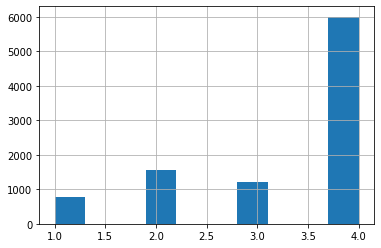

In [38]:
#Check bias
income_data['Target'].hist()

## Heavily biased data. it can't predict the levels 1, 2, 3 accurately. This is a core issue.and affect our models performance. we should undersample the data for better performance

In [39]:
#The most important code
income_data_undersampled= income_data.drop(income_data.query('Target == 4').sample(frac=.75).index)

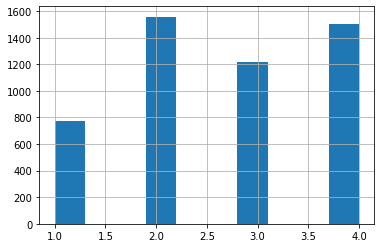

In [40]:
income_data_undersampled['Target'].hist()

## Now we can perform random forest

In [41]:
X = income_data_undersampled.drop(['Id', 'idhogar', 'Target', 'edjefe', 'edjefa'], axis=1)
y = income_data_undersampled['Target']

In [58]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [59]:
model = RandomForestClassifier()
params = {'n_estimators': list(range(40,70, 5))}
gs = GridSearchCV(model, params, cv=5)

In [60]:
gs.fit(X_train, y_train)

GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=RandomForestClassifier(bootstrap=True, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators='warn', n_jobs=None,
                                              oob_score=False,
                                              random_state=None, verbose=0,
                                              warm_start=False),
             iid

In [61]:
pred = gs.predict(X_test)

In [62]:
pred

array([4, 1, 2, ..., 3, 1, 2], dtype=int64)

In [63]:
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

           1       0.94      0.88      0.91       148
           2       0.88      0.92      0.90       313
           3       0.90      0.89      0.90       240
           4       0.87      0.87      0.87       310

    accuracy                           0.89      1011
   macro avg       0.90      0.89      0.89      1011
weighted avg       0.89      0.89      0.89      1011



# We got a good model with  score of.89 for around all performance values.

In [48]:
# for test values we have to clean all values again.so we put it in a function

In [49]:
def clean_data(df):
    income_data = df
    income_data['dependency'] = np.sqrt(income_data['SQBdependency'])
    income_data['edjefe'] = np.sqrt(income_data['SQBedjefe'])
    income_data['edjefa'] = income_data['edjefa'].map({'yes': '1', 'no': '0'}).fillna(income_data['edjefa'])
    income_data['v18q1'] = income_data['v18q1'].fillna(0)
    income_data['rez_esc'] = income_data['rez_esc'].fillna(0)
    income_data['v2a1'] =  income_data['v2a1'].fillna(0)
    #here fillna used for not dropping rows which has null meaneduc and sqbmeaned
    income_data['meaneduc'].fillna(0, inplace =True)
    income_data['SQBmeaned'].fillna(0, inplace =True)
    df = income_data.drop(['idhogar', 'edjefe', 'edjefa'], axis=1)
    return df

In [50]:
data_test = pd.read_csv('test.csv')

In [51]:
ID = data_test['Id']

In [52]:
data_test = clean_data(data_test)

In [53]:
data_test.drop('Id', axis = 1, inplace = True)

In [54]:
data_test.isna().sum()

v2a1               0
hacdor             0
rooms              0
hacapo             0
v14a               0
refrig             0
v18q               0
v18q1              0
r4h1               0
r4h2               0
r4h3               0
r4m1               0
r4m2               0
r4m3               0
r4t1               0
r4t2               0
r4t3               0
tamhog             0
tamviv             0
escolari           0
rez_esc            0
hhsize             0
paredblolad        0
paredzocalo        0
paredpreb          0
pareddes           0
paredmad           0
paredzinc          0
paredfibras        0
paredother         0
                  ..
instlevel9         0
bedrooms           0
overcrowding       0
tipovivi1          0
tipovivi2          0
tipovivi3          0
tipovivi4          0
tipovivi5          0
computer           0
television         0
mobilephone        0
qmobilephone       0
lugar1             0
lugar2             0
lugar3             0
lugar4             0
lugar5       

In [55]:
pred_test = gs.predict(data_test)

In [67]:
Test_results = pd.DataFrame({'ID' : ID, 'Target' : pred_test})
Test_results.Target.value_counts()

4    13676
2     6352
3     2651
1     1177
Name: Target, dtype: int64

In [57]:
Test_results.to_csv('Income_test_results.csv', index = False)